In [3]:
import pandas as pd
import pickle
import numpy as np

In [4]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [5]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,1,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,1,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,1,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,1,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [6]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [7]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [8]:
df['city'] = cities
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [9]:
df.drop(columns=['venue'],inplace=True)

In [10]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo


In [11]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [12]:
df = df[df['city'].isin(eligible_cities)]
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo


In [13]:
df['current_score'] = df.groupby('match_id')['runs'].cumsum()

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\190681986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id')['runs'].cumsum()


In [14]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,125
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,125
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [15]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [16]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\562775579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [17]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\2304996896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\2304996896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,963,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,963,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
115323,963,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [18]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()
df['wickets_left'] = 10 - df['player_dismissed']

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\3929200049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\3929200049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\3929200049.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [19]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
115321,963,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
115322,963,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
115323,963,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [20]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\914577034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [21]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
115321,963,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
115322,963,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
115323,963,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [22]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30)['runs'].sum().values.tolist())

In [23]:
df['last_five'] = last_five

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\1595651733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [24]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,1,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,1,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,1,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,1,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,1,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,963,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
115321,963,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
115322,963,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
115323,963,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [42]:
#total score of every match at the end
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')
final_df

,match_id,runs_x,batting_team,bowling_team,ball,runs_y,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,1,168,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,1,168,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,1,168,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,1,168,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,1,168,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,963,128,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
50497,963,128,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
50498,963,128,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
50499,963,128,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [26]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [27]:
final_df.dropna(inplace=True)

In [28]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [29]:
final_df = final_df.sample(final_df.shape[0])

In [30]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
18536,West Indies,South Africa,Johannesburg,30,88,8,5.625000,29.0,131
196,Australia,Sri Lanka,Adelaide,103,52,9,9.088235,39.0,187


In [31]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
10404,India,Bangladesh,Nagpur,171,2,5,8.694915,43.0
13213,Australia,India,Sydney,50,85,9,8.571429,37.0
8388,Pakistan,Australia,Abu Dhabi,64,69,9,7.529412,36.0
8541,Pakistan,Australia,Dubai,93,39,9,6.888889,31.0
36754,West Indies,Bangladesh,Mirpur,86,55,8,7.938462,43.0
...,...,...,...,...,...,...,...,...
22851,South Africa,England,Centurion,219,13,5,12.280374,50.0
676,South Africa,England,Southampton,60,62,7,6.206897,27.0
43006,South Africa,Australia,Melbourne,44,78,8,6.285714,30.0
34067,West Indies,England,Nottingham,142,11,6,7.816514,57.0


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define the column transformer
trf = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ], 
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=1))
])

# Save the pipeline to a file
import pickle
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)


In [34]:
import pandas as pd
import numpy as np

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Pandas version: 2.0.3
NumPy version: 1.24.3


In [35]:
import sklearn
sklearn.__version__

'1.3.0'

In [36]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9866649764953014
1.6355880352662655


In [37]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [38]:
import xgboost
xgboost.__version__

'2.1.0'

In [39]:
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad']

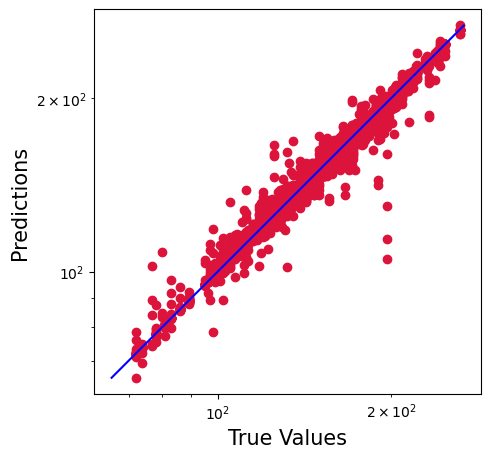

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\2240557131.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_14280\2240557131.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

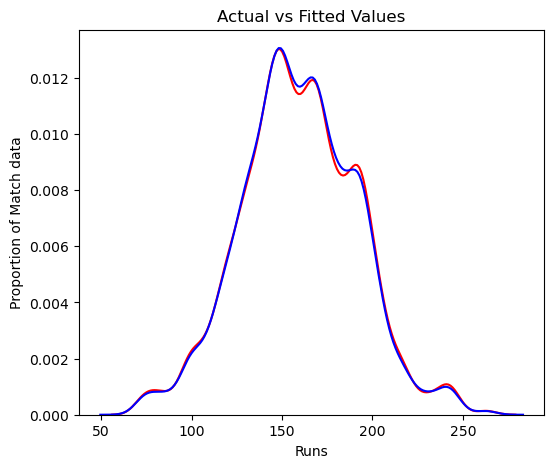

In [41]:
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Runs')
plt.ylabel('Proportion of Match data')

plt.show()
plt.close()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import pickle

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = pipe.predict(X_train)

# Make predictions on the testing data
y_test_pred = pipe.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the metrics
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R2: {train_r2}")
print(f"Validation MAE: {test_mae}")
print(f"Validation MSE: {test_mse}")
print(f"Validation R2: {test_r2}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training MAE: 0.009823751265238703
Training MSE: 0.11579814630486887
Training R2: 0.9998870681273667
Validation MAE: 1.6645246870552428
Validation MSE: 12.43502096543663
Validation R2: 0.9879871210783441
